In [1]:
import pandas as pd

In [2]:
chicago_taxi_data = pd.read_csv('chicago_taxi_data.csv')

In [3]:
chicago_taxi_data.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,d7bf7332e89c6597d682495ac78a325c2ed4183f,d0653a3c1a990641559a9e6e7c0e07db3765fe11e48ad7...,2018-01-01T00:15:00.000,2018-01-01T00:30:00.000,1080.0,3.7,NaN,NaN,NaN,NaN,...,0.0,17.55,Credit Card,Choice Taxi Association,NaN,NaN,NaN,NaN,NaN,NaN
1,c8769473b60b18f700afce0f812f6d80c3616ca7,21c5d83c2cb73035c6c4d35da452ff1714aff86f5efb32...,2018-01-01T00:15:00.000,2018-01-01T00:30:00.000,240.0,0.3,NaN,NaN,NaN,NaN,...,1.0,5.50,Cash,Choice Taxi Association,NaN,NaN,NaN,NaN,NaN,NaN
2,c52d1cd141c3036d091ed85cbf7a973cc5c1243e,a6c3cb7ab4c037a7db9e2fd3513f28e0ff17c8547a70bd...,2018-01-01T00:15:00.000,2018-01-01T00:15:00.000,60.0,0.4,NaN,NaN,NaN,NaN,...,0.0,3.75,Cash,Dispatch Taxi Affiliation,NaN,NaN,NaN,NaN,NaN,NaN
3,b5714d1d2118642f789ab0fec542f597f986c251,d8238dd38b47fc0268e0bd92bba094676752dfefeafea9...,2018-01-01T00:15:00.000,2018-01-01T00:30:00.000,840.0,2.7,NaN,NaN,NaN,NaN,...,1.0,11.50,Cash,Star North Management LLC,NaN,NaN,NaN,NaN,NaN,NaN
4,0352e306e7cc33a455c3be20764ad2ce9881216a,7698f29134c0f429f821af4e89a8f769b85e376bd37b3c...,2018-01-01T00:15:00.000,2018-01-01T00:15:00.000,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,14.50,Credit Card,Suburban Dispatch LLC,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
chicago_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     550000 non-null  object 
 1   taxi_id                     549990 non-null  object 
 2   trip_start_timestamp        550000 non-null  object 
 3   trip_end_timestamp          549998 non-null  object 
 4   trip_seconds                549973 non-null  float64
 5   trip_miles                  549974 non-null  float64
 6   pickup_census_tract         346969 non-null  float64
 7   dropoff_census_tract        344770 non-null  float64
 8   pickup_community_area       497747 non-null  float64
 9   dropoff_community_area      485958 non-null  float64
 10  fare                        549966 non-null  float64
 11  tips                        549966 non-null  float64
 12  tolls                       394312 non-null  float64
 13  extras        

In [5]:
chicago_taxi_data.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,549973.000000,549974.000000,3.469690e+05,3.447700e+05,497747.000000,485958.000000,549966.000000,549966.000000,394312.000000,549966.000000,549966.000000,498107.000000,498107.000000,487541.000000,487541.000000
mean,721.993394,3.377140,1.703141e+10,1.703138e+10,25.628823,22.130437,12.486798,1.452514,0.004011,0.953495,15.001324,41.899976,-87.662754,41.899684,-87.652907
std,1292.196198,5.582423,3.445487e+05,3.330829e+05,20.346367,17.404893,40.968192,2.932541,0.375576,10.814674,43.506596,0.040265,0.078254,0.038751,0.057452
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,300.000000,0.600000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.500000,0.000000,0.000000,0.000000,6.500000,41.880994,-87.655879,41.880994,-87.655998
50%,484.000000,1.210000,1.703128e+10,1.703128e+10,28.000000,24.000000,7.500000,0.000000,0.000000,0.000000,9.000000,41.892042,-87.632746,41.892073,-87.632746
75%,840.000000,3.100000,1.703184e+10,1.703184e+10,32.000000,32.000000,12.250000,2.000000,0.000000,1.000000,14.250000,41.901207,-87.626211,41.907492,-87.626211
max,86340.000000,783.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,8000.900000,500.000000,75.000000,4499.440000,8050.970000,42.016046,-87.534903,42.021224,-87.534903


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

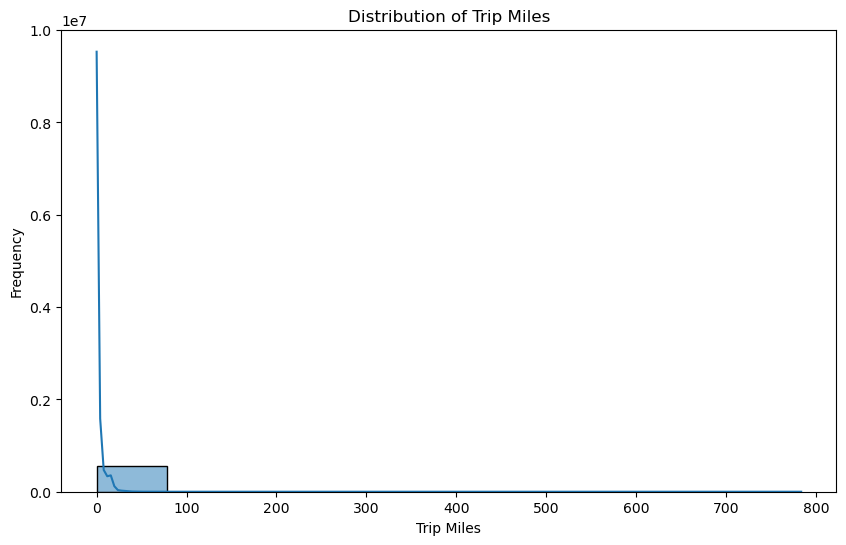

In [7]:
# Plot a distribution plot for the 'trip_miles' variable using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_data['trip_miles'], bins=10, kde=True)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Miles')
plt.show()

In [8]:
chicago_taxi_data.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,549973.000000,549974.000000,3.469690e+05,3.447700e+05,497747.000000,485958.000000,549966.000000,549966.000000,394312.000000,549966.000000,549966.000000,498107.000000,498107.000000,487541.000000,487541.000000
mean,721.993394,3.377140,1.703141e+10,1.703138e+10,25.628823,22.130437,12.486798,1.452514,0.004011,0.953495,15.001324,41.899976,-87.662754,41.899684,-87.652907
std,1292.196198,5.582423,3.445487e+05,3.330829e+05,20.346367,17.404893,40.968192,2.932541,0.375576,10.814674,43.506596,0.040265,0.078254,0.038751,0.057452
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,300.000000,0.600000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.500000,0.000000,0.000000,0.000000,6.500000,41.880994,-87.655879,41.880994,-87.655998
50%,484.000000,1.210000,1.703128e+10,1.703128e+10,28.000000,24.000000,7.500000,0.000000,0.000000,0.000000,9.000000,41.892042,-87.632746,41.892073,-87.632746
75%,840.000000,3.100000,1.703184e+10,1.703184e+10,32.000000,32.000000,12.250000,2.000000,0.000000,1.000000,14.250000,41.901207,-87.626211,41.907492,-87.626211
max,86340.000000,783.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,8000.900000,500.000000,75.000000,4499.440000,8050.970000,42.016046,-87.534903,42.021224,-87.534903


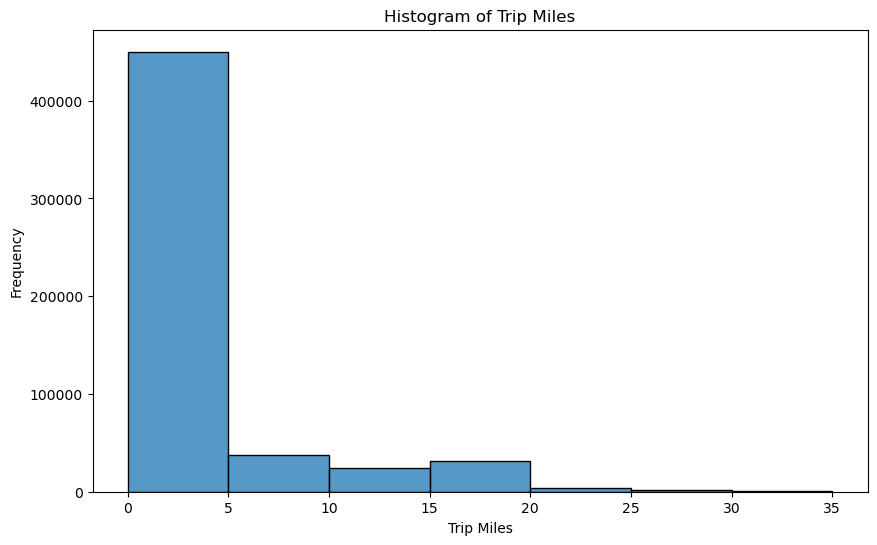

In [9]:
# Define the bin edges
bins = range(0, 36, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_data['trip_miles'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

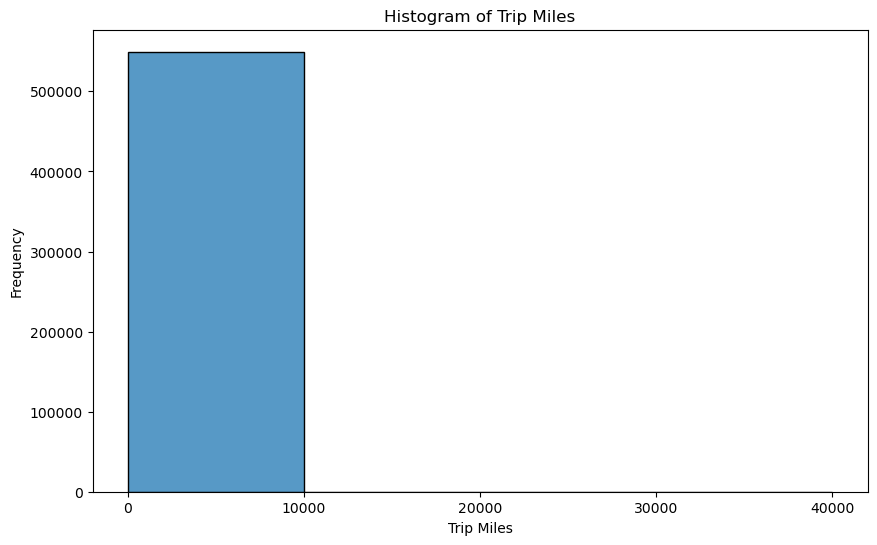

In [10]:
# Define the bin edges
bins = range(0, 50000, 10000)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_data['trip_seconds'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [11]:
chicago_taxi_data['trip_seconds'].dtype

dtype('float64')

In [12]:
# Convert trip_seconds to trip_minutes
chicago_taxi_data['trip_minutes'] = chicago_taxi_data['trip_seconds'] / 60

In [13]:
chicago_taxi_data['trip_minutes'].describe()

count    549973.000000
mean         12.033223
std          21.536603
min           0.000000
25%           5.000000
50%           8.066667
75%          14.000000
max        1439.000000
Name: trip_minutes, dtype: float64

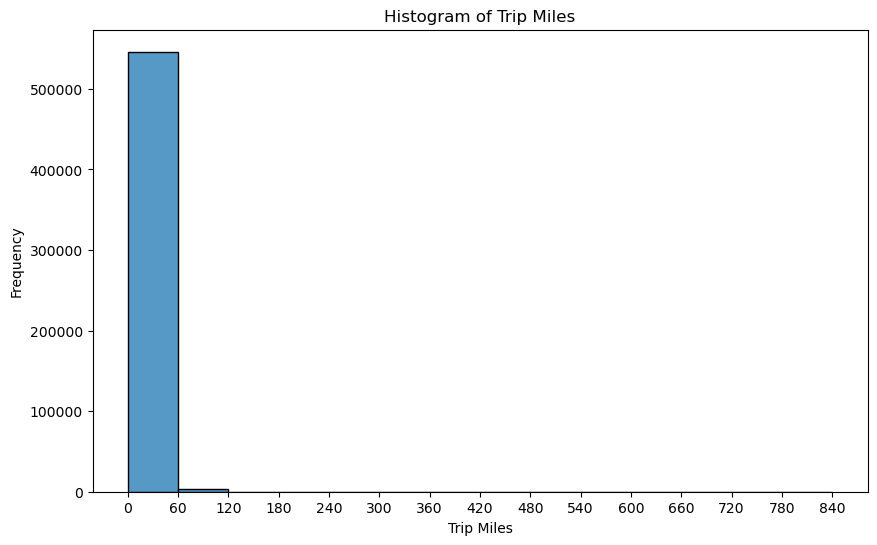

In [14]:
# Define the bin edges
bins = range(0, 900, 60)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_data['trip_minutes'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [15]:
# Select rows where trip_minutes is <= 60
filtered_df = chicago_taxi_data[chicago_taxi_data['trip_minutes'] <= 60]

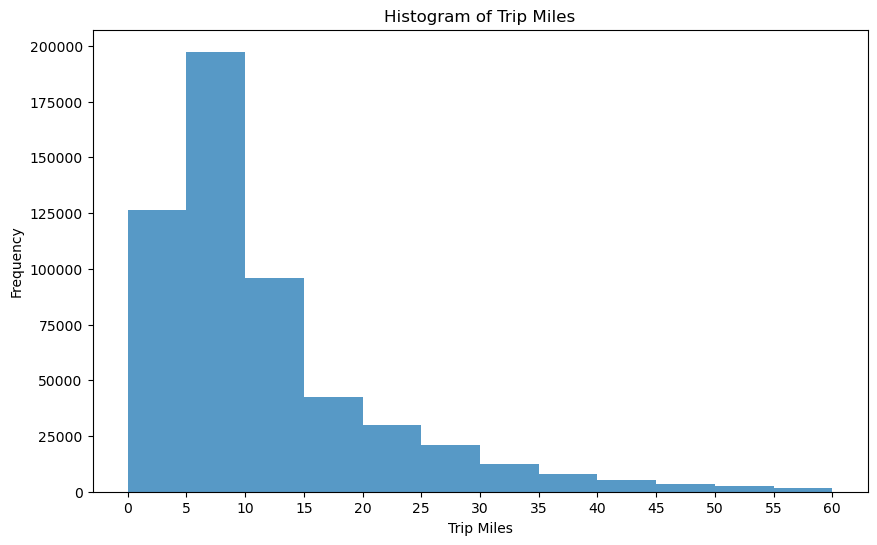

In [16]:
# Define the bin edges
bins = range(0, 65, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['trip_minutes'], bins=bins, edgecolor=None)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [17]:
chicago_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     550000 non-null  object 
 1   taxi_id                     549990 non-null  object 
 2   trip_start_timestamp        550000 non-null  object 
 3   trip_end_timestamp          549998 non-null  object 
 4   trip_seconds                549973 non-null  float64
 5   trip_miles                  549974 non-null  float64
 6   pickup_census_tract         346969 non-null  float64
 7   dropoff_census_tract        344770 non-null  float64
 8   pickup_community_area       497747 non-null  float64
 9   dropoff_community_area      485958 non-null  float64
 10  fare                        549966 non-null  float64
 11  tips                        549966 non-null  float64
 12  tolls                       394312 non-null  float64
 13  extras        

In [18]:
chicago_taxi_data['company'].nunique()

67

In [19]:
chicago_taxi_data[['trip_start_timestamp']]

,trip_start_timestamp
0,2018-01-01T00:15:00.000
1,2018-01-01T00:15:00.000
2,2018-01-01T00:15:00.000
3,2018-01-01T00:15:00.000
4,2018-01-01T00:15:00.000
...,...
549995,2018-01-12T10:30:00.000
549996,2018-01-12T10:30:00.000
549997,2018-01-12T10:30:00.000
549998,2018-01-12T10:30:00.000


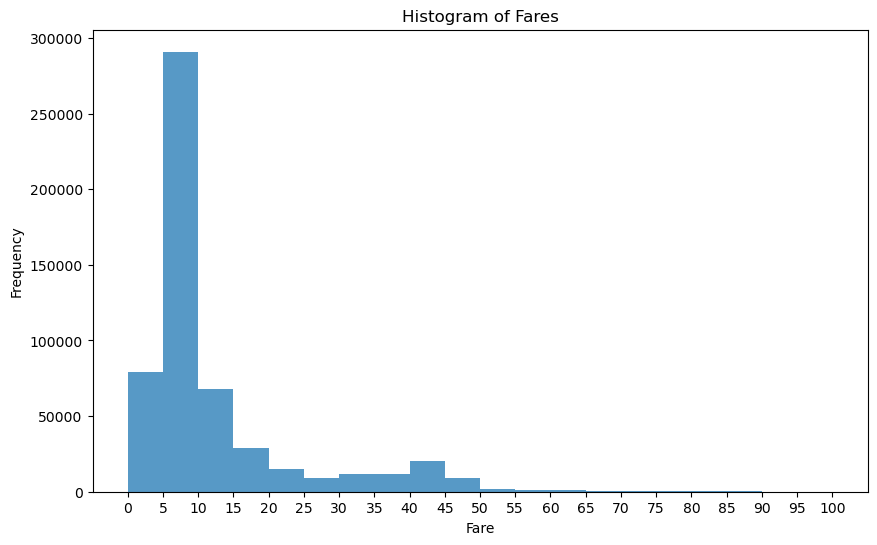

In [20]:
# Define the bin edges
bins = range(0, 105, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_data['fare'], bins=bins, edgecolor=None)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fares')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [21]:
chicago_taxi_data['payment_type'].value_counts()

payment_type
Cash           311531
Credit Card    233072
Prcard           1563
Mobile           1498
Unknown          1022
No Charge         846
Split             182
Dispute           176
Pcard             110
Name: count, dtype: int64

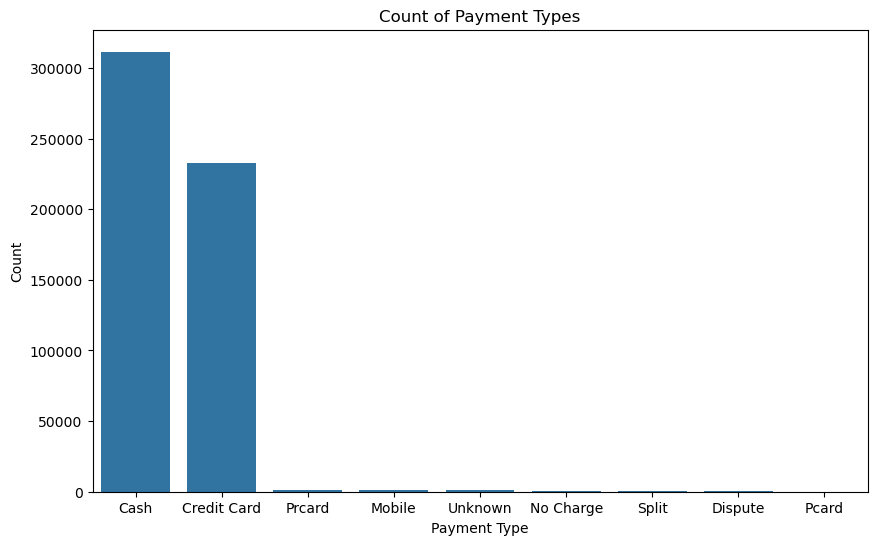

In [22]:
# Count the occurrences of each value in 'payment_type'
payment_counts = chicago_taxi_data['payment_type'].value_counts()

# Plot the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Payment Types')
plt.show()

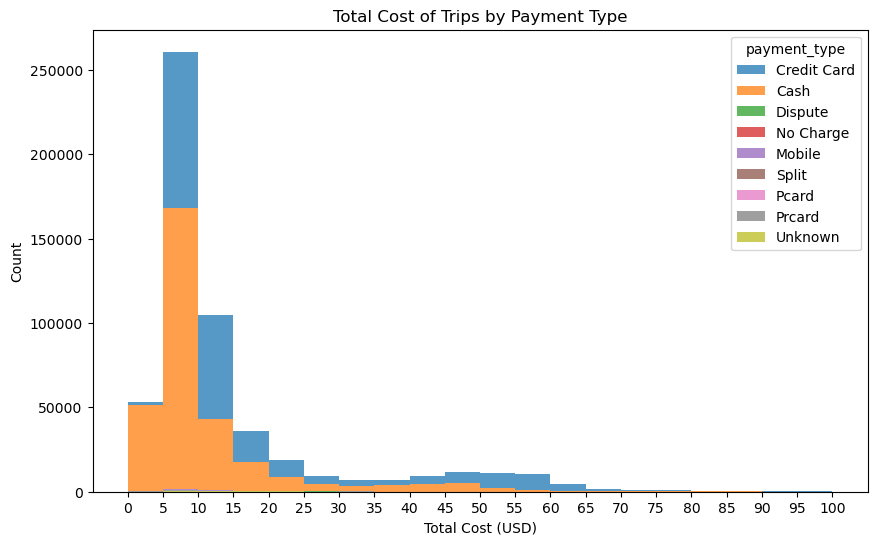

In [23]:
# Define the bin edges
bins = range(0, 105, 5)

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=chicago_taxi_data, x='trip_total', hue='payment_type', multiple='stack', bins=bins, edgecolor=None)
plt.xlabel('Total Cost (USD)')
#plt.ylabel('Frequency')
plt.title('Total Cost of Trips by Payment Type')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

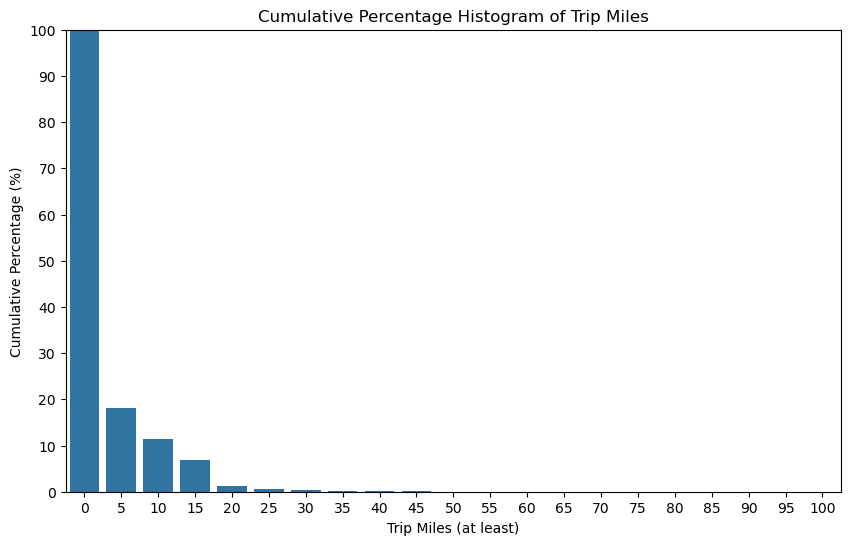

In [24]:
# Calculate cumulative counts
cumulative_counts = [(chicago_taxi_data['trip_miles'] >= b).sum() for b in bins]

# Calculate the total number of trips
total_trips = len(chicago_taxi_data)

# Calculate cumulative percentages
cumulative_percentages = [(count / total_trips) * 100 for count in cumulative_counts]

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({'Miles': bins, 'Percentage': cumulative_percentages})

# Plot the cumulative percentage histogram using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Miles', y='Percentage', data=cumulative_df)
plt.xlabel('Trip Miles (at least)')
plt.ylabel('Cumulative Percentage (%)')
plt.title('Cumulative Percentage Histogram of Trip Miles')
plt.ylim(0, 100)  # Set y-axis to range from 0 to 100%
plt.yticks(range(0, 110, 10))  # Add ticks at every 10%
plt.show()

In [25]:
chicago_taxi_data['trip_start_timestamp'] = pd.to_datetime(chicago_taxi_data['trip_start_timestamp'])

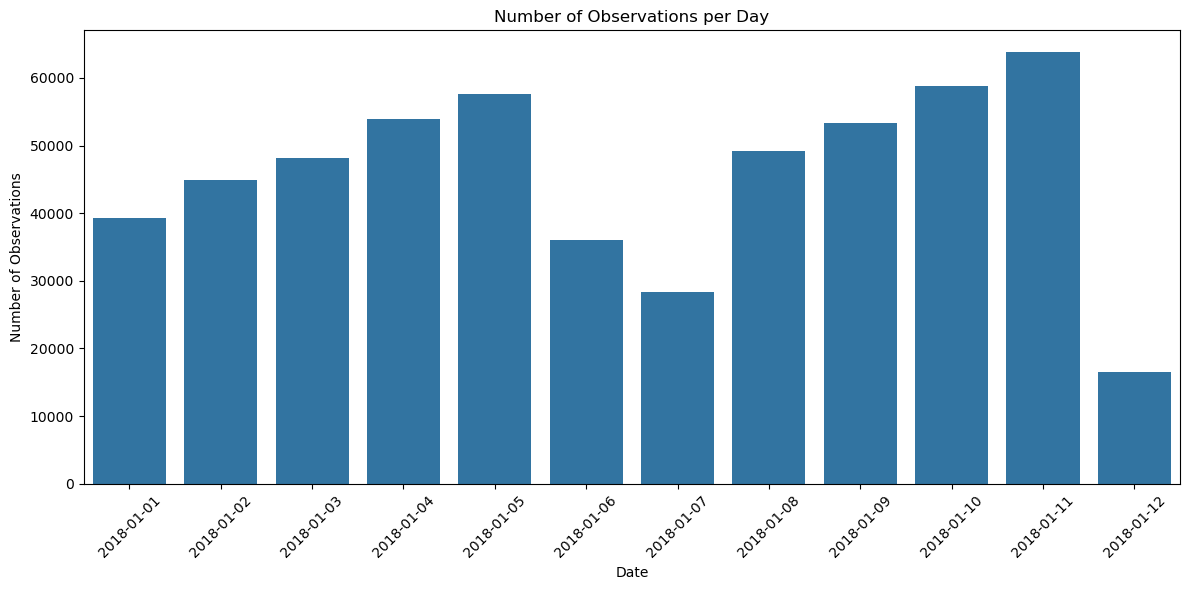

In [26]:
# Extract date from datetime
chicago_taxi_data['date'] = chicago_taxi_data['trip_start_timestamp'].dt.date

# Count observations per date
date_counts = chicago_taxi_data['date'].value_counts().sort_index().reset_index()
date_counts.columns = ['date', 'count']

# Plot the number of observations per day using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='count', data=date_counts)
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

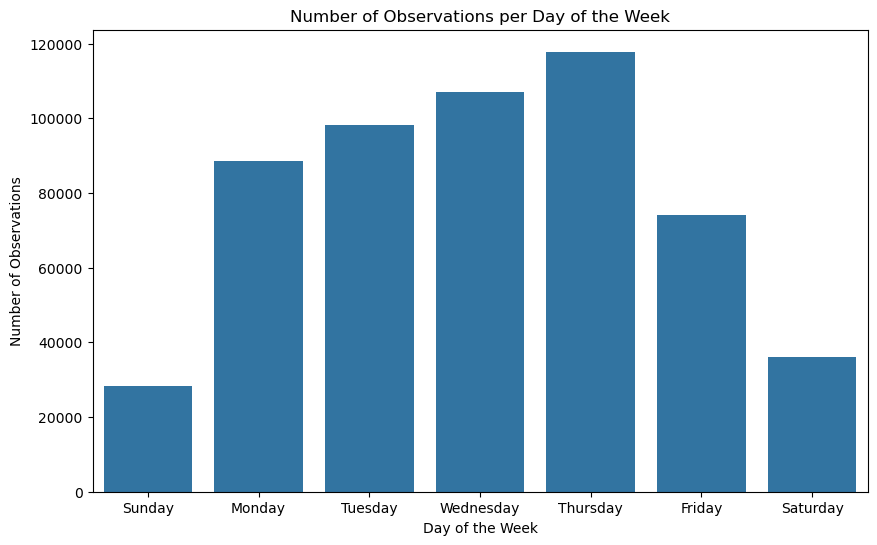

In [27]:
# Extract day of the week
chicago_taxi_data['day_of_week'] = chicago_taxi_data['trip_start_timestamp'].dt.day_name()

# Define the order of days for plotting
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Count observations per day of the week
day_counts = chicago_taxi_data['day_of_week'].value_counts().sort_index().reset_index()
day_counts.columns = ['day_of_week', 'count']

# Plot the number of observations per day of the week using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='count', data=day_counts, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day of the Week')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
chicago_taxi_data['company'].value_counts()

company
Flash Cab                                       76937
Taxi Affiliation Services                       41804
Taxi Affiliation Service Yellow                 41753
Chicago Carriage Cab Corp                       39278
Yellow Cab                                      37363
                                                ...  
3721 - Santamaria Express, Alvaro Santamaria       28
3669 - 85800 Jordan Taxi Inc                       27
5997 - 65283 AW Services Inc.                      27
2809 - 95474 C & D Cab Co Inc.                      6
2241 - 44667 - Felman Corp, Manuel Alonso           5
Name: count, Length: 67, dtype: int64

In [29]:
chicago_taxi_data['pickup_centroid_location'][549999]

"{'type': 'Point', 'coordinates': [-87.6261455896, 41.9027880476]}"

In [30]:
import geopandas as gpd
from shapely.geometry import Point
import ast

In [31]:
chicago_taxi_data = chicago_taxi_data.sample(n=1000)

# Filter out rows where pickup_centroid_location is NaN
chicago_taxi_data = chicago_taxi_data.dropna(subset=['pickup_centroid_location'])
chicago_taxi_data = chicago_taxi_data.dropna(subset=['dropoff_centroid_location'])

In [32]:
# Convert the string representation into actual dictionaries
def parse_location(location_str):
    return ast.literal_eval(location_str)

chicago_taxi_data['pickup_centroid_location'] = chicago_taxi_data['pickup_centroid_location'].apply(parse_location)
chicago_taxi_data['dropoff_centroid_location'] = chicago_taxi_data['dropoff_centroid_location'].apply(parse_location)

# Extract coordinates and create Point geometries
def create_point(location_dict):
    coords = location_dict['coordinates']
    return Point(coords[0], coords[1])

chicago_taxi_data['pickup_geometry'] = chicago_taxi_data['pickup_centroid_location'].apply(create_point)
chicago_taxi_data['dropoff_geometry'] = chicago_taxi_data['dropoff_centroid_location'].apply(create_point)

# Create a GeoDataFrame
pickup_gdf = gpd.GeoDataFrame(chicago_taxi_data, geometry='pickup_geometry')
dropoff_gdf = gpd.GeoDataFrame(chicago_taxi_data, geometry='dropoff_geometry')

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
pickup_gdf.set_crs(epsg=4326, inplace=True)
dropoff_gdf.set_crs(epsg=4326, inplace=True)

# Path to the shapefile of Chicago's boundaries (you need to have this file locally)
# You can download a shapefile of Chicago's boundaries from an online source
shapefile_path = 'Boundaries - Community Areas (current)/geo_export_9804d3cb-37ef-427a-9192-e8f531d8262f.shp'

# Read the shapefile using GeoPandas
chicago_map = gpd.read_file(shapefile_path)

# Ensure the CRS of the shapefile matches the GeoDataFrame CRS
chicago_map = chicago_map.to_crs(epsg=4326)

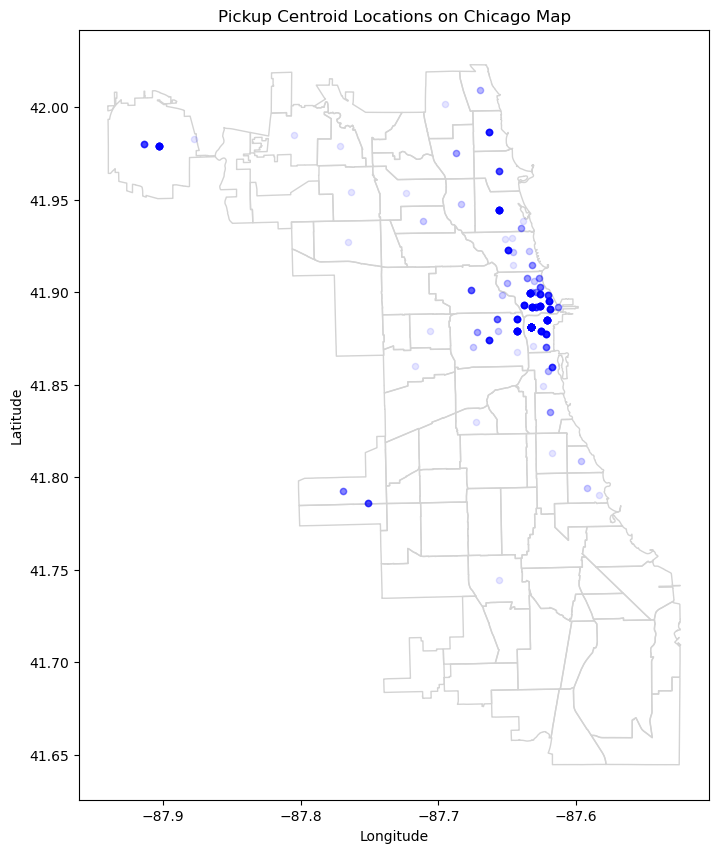

In [33]:
# Plot the map and the pickup locations
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.boundary.plot(ax=ax, linewidth=1, color='lightgray', zorder=1)
pickup_gdf.plot(ax=ax, marker='o', color='blue', markersize=20, zorder=3, alpha=0.1)
#dropoff_gdf.plot(ax=ax, marker='o', color='red', markersize=50, zorder=2, alpha=0.1)
plt.title('Pickup Centroid Locations on Chicago Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.grid(True)
plt.show()

In [39]:
# Convert the pickup_community_area column to numeric, forcing errors to NaN
pickup_gdf['pickup_community_area'] = pd.to_numeric(pickup_gdf['pickup_community_area'], errors='coerce')

# Drop rows with NaN values in pickup_community_area
pickup_gdf = pickup_gdf.dropna(subset=['pickup_community_area'])

pickup_gdf['pickup_community_area'].astype(int)

380918     8
167004     8
240141    32
545202     8
135848     8
          ..
293558     8
38876     28
455767    32
485407    77
132246    76
Name: pickup_community_area, Length: 867, dtype: int64

/Users/maximtorgovitski/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


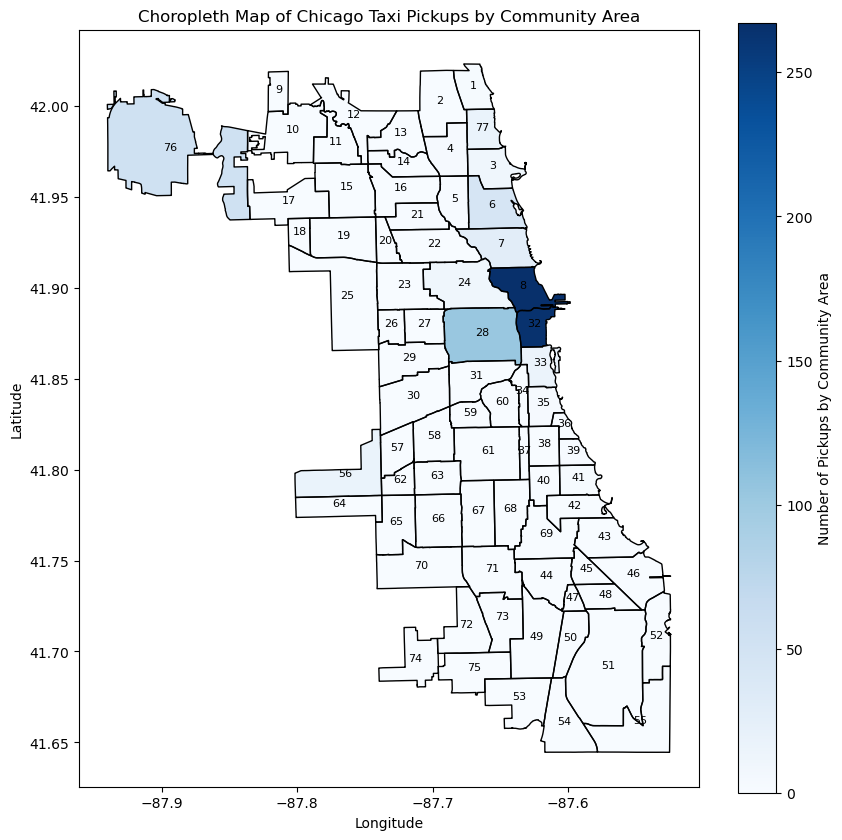

In [40]:
# Ensure the join columns are of the same type (both as int)
# Convert the pickup_community_area column to numeric, forcing errors to NaN
pickup_gdf['pickup_community_area'] = pd.to_numeric(pickup_gdf['pickup_community_area'], errors='coerce')

# Drop rows with NaN values in pickup_community_area
pickup_gdf = pickup_gdf.dropna(subset=['pickup_community_area'])

pickup_gdf['pickup_community_area'].astype(int)
chicago_map['area_num_1'] = chicago_map['area_num_1'].astype(int)

# Perform the join based on community area
merged_gdf = pickup_gdf.merge(chicago_map, left_on='pickup_community_area', right_on='area_num_1')

# Aggregate the data by community area
area_counts = merged_gdf.groupby('area_num_1').size()

# Merge the counts back to the community areas GeoDataFrame
chicago_map['counts'] = chicago_map['area_num_1'].map(area_counts).fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.plot(column='counts', ax=ax, legend=True, 
                 legend_kwds={'label': "Number of Pickups by Community Area"},
                 cmap='Blues', missing_kwds={'color': 'lightgrey'})

chicago_map.boundary.plot(ax=ax, linewidth=1, color='black')

# Add community area numbers to the map
for idx, row in chicago_map.iterrows():
    plt.annotate(text=row['area_num_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Choropleth Map of Chicago Taxi Pickups by Community Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [65]:
chicago_wards = gpd.read_file('Boundaries_-_Wards__2023-__20240721.csv')

In [73]:
chicago_wards['geometry'] = chicago_wards['the_geom']

/var/folders/l2/9w71jzfn5vj666y5m4sqd5rc0000gn/T/ipykernel_3938/4109306845.py:1: UserWarning: Geometry column does not contain geometry.
  chicago_wards['geometry'] = chicago_wards['the_geom']


In [75]:
chicago_wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ward        50 non-null     object
 1   the_geom    50 non-null     object
 2   objectid    50 non-null     object
 3   edit_date   50 non-null     object
 4   ward_id     50 non-null     object
 5   globalid    50 non-null     object
 6   st_area_sh  50 non-null     object
 7   st_length_  50 non-null     object
 8   geometry    50 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB
